# 03 Algorithms

## 3.15 Policy Gradient Methods

### Metrics of Policy

在此之前，我们已经介绍了使用神经网络近似状态价值或动作价值的算法，如DQN。然而，在许多实际应用中，我们更关心的是如何学习到一个策略（policy），即从状态到动作的映射。这种情况下，我们可以使用策略梯度方法（Policy Gradient Methods）来直接对策略进行优化。

假设$J(\theta)$是一个标量，用于表示策略$\pi$的性能度量，我们的目标是最大化这个目标函数。根据基于梯度的算法，我们可以通过以下公式更新参数$\theta$：
$$
\theta_{t+1} = \theta_t + \alpha \nabla J(\theta)
$$

一般地，策略的性能度量基于状态价值期望或奖励期望。这里我们对于这两种性能度量分别做以下定义：
| Metric | Expression 1                | Expression 2             | Expression 3                                                                 |
|--------|-----------------------------|--------------------------|------------------------------------------------------------------------------|
| $ \bar{v}_\pi $ | $ \sum_{s \in S} d(s) v_\pi(s) $ | $ E_{S \sim d}[v_\pi(S)] $  | $ \lim_{n \to \infty} E \left[ \sum_{t=0}^{n} \gamma^t R_{t+1} \right] $  |
| $ \bar{r}_\pi $ | $ \sum_{s \in S} d_\pi(s) r_\pi(s) $ | $ E_{S \sim d_\pi}[r_\pi(S)] $ | $ \lim_{n \to \infty} \frac{1}{n} E \left[ \sum_{t=0}^{n-1} R_{t+1} \right] $  |

其中，$d(s)$ 是是状态$s$的权重，满足$d(s) \geq 0$和$\sum_{a \in \cal S}$=1，一般地可以定义为均匀分布（$d_0(s)=\frac{1}{\cal |S|}$）或平稳分布($d_{\pi}^T P_{\pi} = d_{\pi}^T$，$P_{\pi}$是状态转移矩阵)。

上述所有指标都是策略$\pi$的函数，而策略$\pi$又被参数化表示为$\theta$，因此我们可以将这些指标表示为$\theta$的函数。简言之，不同的参数$\theta$对应着不同的指标值.

另外，状态价值期望$\bar v_{\pi}$和奖励期望$\bar r_{\pi}$之间的关系可以表示如下：
$$ \bar r_{\pi} = (1 - \gamma) \bar v_{\pi} $$













### Gradients of the Metrics

令
$$
J(\theta) = \sum_{s \in \cal S} \eta (s) v_{\pi}(s) = \sum_{s \in \cal S} \eta (s) \sum_{a \in \cal A} \pi(a|s;\theta) q_{\pi}(s, a)
$$
其中$\eta(s)$是平稳分布，$v_{\pi}(s)$是状态价值函数、$q_{\pi}(s, a)$是动作价值函数、$\pi(a|s;\theta)$是策略函数。

对于这个目标函数$J(\theta)$，我们可以计算它的梯度：
$$
\nabla_{\theta} J(\theta) = \sum_{s \in \cal S} \eta (s) \left( \sum_{a \in \cal A} q_{\pi}(s, a) \nabla_{\theta} \pi(a|s;\theta) \right)  \ \ \ \ \  *
$$

进一步地，由
$$
\nabla_{\theta} \log \pi(a|s;\theta) = \frac{\nabla_{\theta} \pi(a|s;\theta)}{\pi(a|s;\theta)}
$$
知：
$$
\nabla_{\theta} \pi(a|s;\theta) = \nabla_{\theta} \log \pi(a|s;\theta) \pi(a|s;\theta)
$$

代入(*)式中，得：
$$
\begin{aligned}
\nabla_{\theta} J(\theta) &= \sum_{s \in \cal S} \eta (s) \left( \sum_{a \in \cal A} q_{\pi}(s, a) \nabla_{\theta} \log \pi(a|s;\theta) \pi(a|s;\theta) \right) \\
&= \mathbb{E}_{S \sim \eta, A \sim \pi(S, \theta)} \Big[q_{\pi}(S, A) \nabla_{\theta} \log \pi(A|S;\theta) \Big]
\end{aligned}
$$

为了保证$\log \pi(A|S;\theta)$的有效，我们使用$softmax \ functions$：
$$
\pi(a|s;\theta) = \frac{e^{h(s,a,\theta)}}{\sum_{a' \in \cal A(s)} e^{h(s,a,\theta)}}
$$




### Monte Carlo Policy Gradient (REINFORCE)

REINFORCE算法是一种策略梯度方法，它通过采样得到的轨迹来估计策略梯度。其更新规则如下：
$$
\begin{aligned}
\theta_{t+1} &= \theta_t + \alpha \nabla_{\theta} J(\theta_t) \\
&= \theta_t + \alpha \mathbb{E} \Big[q_{\pi}(S, A) \nabla_{\theta} \log \pi(A|S;\theta) \Big]
\end{aligned}
$$
使用随机梯度法进行估计，可以得到：
$$
\theta_{t+1} = \theta_t + \alpha \nabla_{\theta} \log \pi(a_t|s_t;\theta_t) q_{t}(s_t, a_t) \ \ **
$$

由于：
$$
\nabla_{\theta} \log \pi(a|s;\theta) = \frac{\nabla_{\theta} \pi(a|s;\theta)}{\pi(a|s;\theta)}
$$
所以，可以对式(**)进行重新变换：
$$
\begin{aligned}
\theta_{t+1} &= \theta_t + \alpha \left(\frac{q_t(s_t,a_t)}{\pi(a_t|s_t;\theta_t)} \right) \nabla_{\theta} \pi(a|s;\theta) \\
&= \theta_t + \alpha \beta_t \nabla_{\theta} \pi(a|s;\theta)
\end{aligned}
$$

其中，$\beta_t = \frac{q_t(s_t,a_t)}{\pi(a_t|s_t;\theta_t)}$。

当$\beta_t \geq 0$，$\pi(a_t|s_t;\theta_{t+1}) \geq \pi(a_t|s_t;\theta_{t})$，选择$(s_t,a_t)$的可能性增强；

相反，当$\beta_t < 0$，$\pi(a_t|s_t;\theta_{t+1}) < \pi(a_t|s_t;\theta_{t})$，选择$(s_t,a_t)$的可能性减弱。

### Monte Carlo Policy Gradient (REINFORCE) Algorithm
目标：学习一个最优策略$\pi_{\theta}(a|s)$，使得期望回报$J(\theta)$最大化

- 初始化策略网络参数$\theta$、折扣因子$\gamma$和步长$\alpha$
- $for \ e = 1 \rightarrow E \ do$：
    - 根据当前策略$\pi_{\theta}(a|s)$采样轨迹$\tau = (s_0, a_0, r_1, ..., s_{T-1}, a_{T-1}, r_T)$，其中$r_t = r(s_t, a_t)$
    - $for t=0,1,\cdots, T-1 \ do$
        - Value Update：$q_t(s_t, a_t)=\sum_{k={t+1}}^T \gamma^{k-t-1} r_k$
        - Policy Update：$\theta_{t+1} = \theta_t + \alpha \nabla_{\theta} \log \pi(a_t|s_t;\theta_t) q_{t}(s_t, a_t)$

### 一条非常重要的说明

对于Policy Update部分，编码实现时是通过构造一个损失函数，然后通过梯度下降的方法来更新参数的。具体来说，损失函数是:
$$
L(\theta_t) = -\log \pi(a_t|s_t;\theta_t) q_{t}(s_t, a_t)
$$

**为什么要做这样的设计？**

- 主流框架搭多是为监督学习设计的，这些框架搭多使用梯度下降，而强化学习的目标是最大化期望回报，为了方便使用这些框架和梯度下降，定义损失函数为$L(\theta)=-J(\theta)$，然后使用梯度下降的方法来最大化$J(\theta)$；
- 使用策略梯度替代loss在某种程度上衡量了两个分布（agent与环境交互产生轨迹获得的reward分布，和策略网络输出的分布）的距离，形式上与交叉熵损失函数类似。

### Example

In [1]:
import sys
import time
sys.path.append('..')

import torch
import torch.nn as nn
import numpy as np
import gymnasium as gym
from tqdm import tqdm

from Utils.tools import get_device, plot_returns_curve

In [2]:
class PolicyNetwork(nn.Module):
    """ Policy Network """

    def __init__(self, state_dim, hidden_dim, action_dim):
        super(PolicyNetwork, self).__init__()

        self.fc1 = nn.Linear(state_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, action_dim)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        return nn.functional.softmax(self.fc3(x), dim=1)

In [3]:
class REINFORCE:
    """ Monte Carlo Methods """

    def __init__(self, env, state_dim, hidden_dim, action_dim, learning_rate=0.001, gamma=0.99, device=None):
        self.env = env
        self.gamma = gamma

        if device is None:
            device = get_device()
        self.device = device

        self.policy_net = PolicyNetwork(state_dim, hidden_dim, action_dim).to(self.device)
        self.optimizer = torch.optim.Adam(self.policy_net.parameters(), lr=learning_rate)
        self.criterion = nn.MSELoss()

        self.returns = []

    def take_action(self, state):
        """ Take action according to the policy network """
        # Convert state to tensor
        state = torch.tensor(np.array([state]), dtype=torch.float32).to(self.device)
        # Get action probabilities from the policy network
        action_probs = self.policy_net(state)
        # Sample an action according to the action probabilities
        action_dist = torch.distributions.Categorical(action_probs)
        action = action_dist.sample()
        return action.item()

    def generate_episode(self, state):
        episode = []
        done = False
        while not done:
            action = self.take_action(state)
            next_state, reward, terminated, truncated, info = self.env.step(action)

            done = terminated or truncated
            episode.append((state, action, reward, next_state, done))
            state = next_state
        return episode

    def update(self, episode):
        """ Update policy network using an episode """

        # Initialize the q value
        episode_return = 0
        self.optimizer.zero_grad()
        for state, action, reward, next_state, done  in reversed(episode):
            # Update the q value
            episode_return = reward + self.gamma * episode_return
            # Convert to tensor
            state = torch.tensor(np.array([state]), dtype=torch.float32).to(self.device)
            action = torch.tensor(np.array([action])).view(-1, 1).to(self.device)

            # Compute policy gradient
            action_probs = self.policy_net(state)
            log_probs = torch.log(action_probs.gather(1, action))
            loss = -log_probs * episode_return  # Why loss is negative of log probability?
            loss.backward()
        # Update the policy network
        self.optimizer.step()

        return episode_return

    def train(self, epochs):
        """ Train the agent using episodes generated by rollout """

        for i in range(10):
            with tqdm(total=epochs // 10, desc=f"Iteration {i+1}") as pbar:
                for epoch in range(epochs // 10):
                    state, info = self.env.reset()

                    episode = self.generate_episode(state)
                    episode_return = self.update(episode)

                    self.returns.append(episode_return)
                    if (epoch + 1) % 10 == 0:
                        pbar.set_postfix(
                            {
                                'epoch': epochs / 10 * i + epoch + 1,
                                'return': np.mean(self.returns)
                            }
                        )
                    pbar.update(1)

    def visualize(self, delay=0.5):
        state, info = self.env.reset()
        done = False

        while not done:
            # self.env.render()
            action = self.take_action(state)
            state, reward, terminated, truncated, info = self.env.step(action)
            done = terminated or truncated
            time.sleep(delay)

        # self.env.render()
        self.env.close()

In [4]:
name = 'CartPole-v1'
environment = gym.make(name, render_mode='rgb_array')

In [5]:
agent = REINFORCE(
    env=environment,
    state_dim=environment.observation_space.shape[0],
    action_dim=environment.action_space.n,
    hidden_dim=64,
    learning_rate=0.0005,
    gamma=0.98,
    device=get_device()
)

In [6]:
agent.train(
    epochs=1000
)

Iteration 1:   0%|          | 0/100 [00:00<?, ?it/s]

Iteration 10: 100%|██████████| 100/100 [02:20<00:00,  1.40s/it, epoch=1e+3, return=39.8]


In [7]:
environment = gym.make(name, render_mode='human')
environment.reset()

agent.env = environment
agent.visualize(delay=0)

2025-02-23 19:55:35.211 python[75487:25372453] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-23 19:55:35.211 python[75487:25372453] +[IMKInputSession subclass]: chose IMKInputSession_Modern


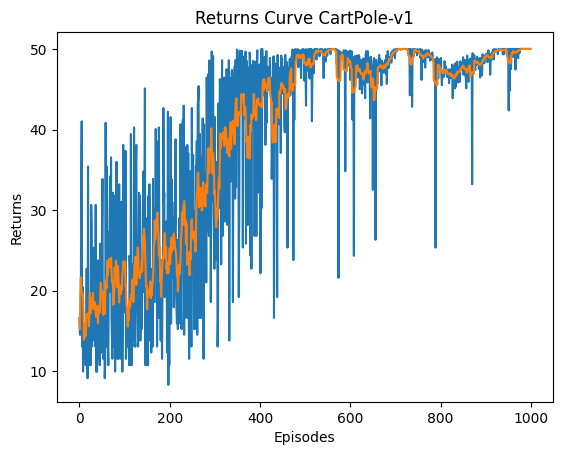

In [8]:
plot_returns_curve(agent.returns, name=name)